## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [4]:
import pandas as pd
df = pd.read_csv('police_killings.csv',encoding='iso-8859-1')
print(df.columns)
df.head()


Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [5]:
# Get the total counts for each racial grouping
racial_groups = pd.crosstab(index=df["raceethnicity"],columns="count",margins=True)
racial_groups

col_0,count,All
raceethnicity,,
Asian/Pacific Islander,10,10
Black,135,135
Hispanic/Latino,67,67
Native American,4,4
Unknown,15,15
White,236,236
All,467,467


In [6]:
# Find the relative % for each racial grouping
# racial_groups["rate"]=racial_groups["count"]/racial_groups.iloc[-1,0]*100
# counts = racial_groups["count"]
# racial_groups
counts = df["raceethnicity"].value_counts()
counts = counts/sum(counts)*100

### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64


([<matplotlib.axis.XTick at 0x7f8152dfdc18>,
 <a list of 6 Text xticklabel objects>)

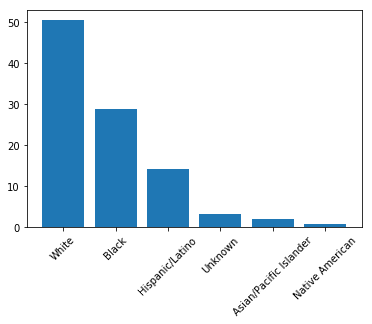

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# Graph the killings by race using a bar chart. Make sure to label the graph and axes
print(counts)
plt.bar(range(6),counts)
plt.xticks(range(6),counts.index,rotation=45)

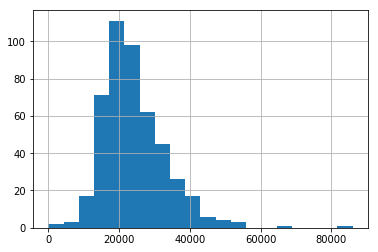

In [8]:
# Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
df["p_income"].str.replace("-","0").astype(int).hist(bins=20)
# df["p_income"][60:407]

In [9]:
# Calculate the median "p_income"
df["p_income"].replace("-","0").astype(int).median()

22255.0

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [10]:
df['state'].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
IL    11
LA    11
WA    11
MD    10
OH    10
MO    10
NC    10
SC     9
MI     9
VA     9
OR     8
AL     8
IN     8
PA     7
KY     7
MS     6
TN     6
MN     6
NE     6
KS     6
UT     5
WI     5
MA     5
NM     5
HI     4
AR     4
ID     4
NV     3
MT     2
WV     2
DE     2
IA     2
AK     2
NH     1
DC     1
ME     1
WY     1
CT     1
Name: state, dtype: int64

In [16]:
# Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic"
# new_df = df[
#         (df['share_white']!='-') &
#         (df['share_black']!='-') &
#         (df['share_hispanic']!='-')
#     ]
new_df = df[['share_white','share_black','share_hispanic']].replace('-','0')
# Convert the values in those columns to float types
new_df = new_df.astype(float)

# Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
new_df = pd.concat( [new_df, df[['pop','county_income','state']] ],axis=1)
new_df
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

lstates = new_df[new_df['state'].isin(lowest_states)]
hstates = new_df[new_df['state'].isin(highest_states)]
new_df.columns



Index(['share_white', 'share_black', 'share_hispanic', 'pop', 'county_income',
       'state'],
      dtype='object')

In [17]:
columns=['pop','county_income','share_white','share_black','share_hispanic']
lstates[columns].astype(float).mean()

pop                4127.947368
county_income     54761.473684
share_white          59.552632
share_black          20.884211
share_hispanic       12.721053
dtype: float64

In [18]:
hstates[columns].astype(float).mean()

pop                4269.344086
county_income     48702.172043
share_white          55.053763
share_black          11.408602
share_hispanic       20.470968
dtype: float64